# Data Science Test Widget Brain.

This assignment focuses on transshipments of a certain port. Each day, many vessels arrive in this port and are served by some stevedore(s). Four cargo types have been identified (ore, coal, oil, and petroleum), and vessels often carry a mixture of cargo types. For each unique vessel arrival (i.e. each row in the data), we would like a prediction of how much it transships (total of load & discharge activities) per cargo type. Variables of interest therefore are: discharge1, load1, discharge2, load2, discharge3, load3, discharge4 and load4. 

The data for this case is stored in ‘VesselData.csv’ and contains historical data. 

We would like you to provide us with a Jupyter notebook or Python script with the results of your endeavors, well enriched with comments elaborating on the steps taken, even if they did not lead you anywhere, and try to motivate your actions as much as possible. We would like to understand the approach you have taken and your line of thought.

Explanation of variables in the data:

| Variable | Explanation   |
|:-----|:-----|
|   eta  | Estimated time of arrival of vessel|
|  ata  | Actual time of arrival of vessel |
|atd	 |           Actual time of departure of vessel |
|vesseldwt|	    Vessel deadweight tonnage|
|vesseltype|	    Vessel type|
|discharge[x]|	Discharge amount of cargo type x|
|load[x]	  |      Load amount of cargo type x|
|stevedorenames|	(Anonymized) stevedore ID’s visited by vessel|
|hasnohamis	   | Boolean whether vessel has the HaMIS notification system|
|earliesteta|	    Estimated time of arrival of first entry to port|
|latesteta	 |   Estimated time of arrival of last entry to port (vessel can spread transshipment(s) over multiple days)|
|traveltype	  |  Travel type|
|previousportid|	ID of previous port|
|nextportid	   | ID of next port|
|isremarkable|	Boolean whether there is anything remarkable regarding the vessel|
|vesselid	  |  Vessel ID|

In [18]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Since the domain is unknown to me, I had to check online what some of the terms meant, 
# e.g. vessel deadweight tonnage, stevedore and some others.

# 4 cargo types: ore, coal, oil, and petroleum

data = pd.read_csv("VesselData.csv")
data.head(10)


,eta,ata,atd,vesseldwt,vesseltype,discharge1,load1,discharge2,load2,discharge3,...,load4,stevedorenames,hasnohamis,earliesteta,latesteta,traveltype,previousportid,nextportid,isremarkable,vesselid
0,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,2017-09-22 00:00:00+00,109290.0,5,0,0,0,0,90173,...,0,Stevedore_104,NaN,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,ARRIVAL,981,731,f,2242
1,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,67170.0,3,0,0,0,0,0,...,0,Stevedore_109,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,19,15,f,5462
2,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,2017-10-01 00:00:00+00,67737.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,ARRIVAL,19,19,f,5251
3,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,43600.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,15,18,f,5268
4,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,9231.0,3,0,0,0,0,0,...,0,Stevedore_98,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,74,27,f,5504
5,2017-09-29 00:00:00+00,2017-09-29 00:00:00+00,2017-10-01 00:00:00+00,74518.0,2,72741,0,0,0,0,...,0,Stevedore_67,NaN,2017-09-29 00:00:00+00,2017-09-29 00:00:00+00,ARRIVAL,981,981,f,7242
6,2017-10-02 00:00:00+00,2017-10-01 00:00:00+00,2017-10-02 00:00:00+00,8620.0,3,0,0,0,0,0,...,0,"Stevedore_109,Stevedore_57,Stevedore_64",NaN,2017-10-01 00:00:00+00,2017-10-02 00:00:00+00,SHIFT,18,766,f,4756
7,2017-10-15 00:00:00+00,2017-10-16 00:00:00+00,2017-10-18 00:00:00+00,46428.0,3,0,0,0,0,0,...,0,Stevedore_102,NaN,2017-10-15 00:00:00+00,2017-10-15 00:00:00+00,ARRIVAL,260,95,f,1716
8,2017-11-06 00:00:00+00,2017-11-06 00:00:00+00,2017-11-07 00:00:00+00,17069.0,5,0,0,0,0,14044,...,0,Stevedore_35,NaN,2017-11-05 00:00:00+00,2017-11-06 00:00:00+00,ARRIVAL,36,286,f,2542
9,2017-10-05 00:00:00+00,2017-10-06 00:00:00+00,2017-10-07 00:00:00+00,67170.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-10-05 00:00:00+00,2017-10-05 00:00:00+00,ARRIVAL,73,19,f,5757


In [20]:
data.shape


(8208, 22)

In [21]:
# Checking data types

data.dtypes

eta                object
ata                object
atd                object
vesseldwt         float64
vesseltype          int64
discharge1          int64
load1               int64
discharge2          int64
load2               int64
discharge3          int64
load3               int64
discharge4          int64
load4               int64
stevedorenames     object
hasnohamis        float64
earliesteta        object
latesteta          object
traveltype         object
previousportid      int64
nextportid          int64
isremarkable       object
vesselid            int64
dtype: object

In [22]:
# Checking missing values. hasnohamis column misses all of them.

data.isna().sum()

eta                  0
ata                  0
atd                  0
vesseldwt            2
vesseltype           0
discharge1           0
load1                0
discharge2           0
load2                0
discharge3           0
load3                0
discharge4           0
load4                0
stevedorenames       2
hasnohamis        8208
earliesteta          0
latesteta            0
traveltype           0
previousportid       0
nextportid           0
isremarkable         0
vesselid             0
dtype: int64

In [23]:
# isremarkable column does not vary at all, I would like to drop it.

print(data.isremarkable.unique())
data.drop(columns = ['isremarkable'], inplace=True, axis=1)


['f']


In [24]:
# Dropping hasnohamis column, as all its values are NaN

data.drop(columns = ['hasnohamis'], inplace=True, axis=1)

# Dropping the rest of rows with NaNs (should be max 4)

data.dropna(inplace=True)
data.shape

(8204, 20)

In [25]:
# I might want to see the data in time, so I convert relevant columns to datetime

date_cols = ['eta', 'ata', 'atd', 'earliesteta', 'latesteta']

data = data.apply(lambda x: pd.to_datetime(x, errors='coerce') if x.name in date_cols else x)

data.dtypes

eta               datetime64[ns, UTC]
ata               datetime64[ns, UTC]
atd               datetime64[ns, UTC]
vesseldwt                     float64
vesseltype                      int64
discharge1                      int64
load1                           int64
discharge2                      int64
load2                           int64
discharge3                      int64
load3                           int64
discharge4                      int64
load4                           int64
stevedorenames                 object
earliesteta       datetime64[ns, UTC]
latesteta         datetime64[ns, UTC]
traveltype                     object
previousportid                  int64
nextportid                      int64
vesselid                        int64
dtype: object

In [26]:
# Since the shipping domain is completely new to me, I am trying to understand what kind 
# of travels the ship makes and other attributes.

# There are 5 vessel types, no more details what exactly that means.

print("Travel type:", data.traveltype.unique())
print("Vessel type:", data.vesseltype.unique())


Travel type: ['ARRIVAL' 'SHIFT']
Vessel type: [5 3 2 4 1]


In [27]:
# Quickly checking main stats of numerical columns.

data.describe()


,vesseldwt,vesseltype,discharge1,load1,discharge2,load2,discharge3,load3,discharge4,load4,previousportid,nextportid,vesselid
count,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000
mean,37915.631399,3.593979,1724.522550,60.784008,1169.268040,19.397001,4793.667967,44.767309,1816.081546,1509.782545,367.110190,380.013164,4336.481472
std,51741.224211,0.987706,16282.325959,1325.786392,11333.868248,665.495307,25371.998882,3072.466648,10025.543034,11939.382986,417.231618,421.704236,1692.151250
min,624.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000
25%,6600.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,25.000000,3238.000000
50%,13031.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,127.000000,4684.000000
75%,46600.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,666.000000,766.000000,5399.250000
max,320805.000000,5.000000,204304.000000,41761.000000,189933.000000,43639.000000,299647.000000,271251.000000,183837.000000,293449.000000,1915.000000,1914.000000,7486.000000


In [28]:
# Just curious how many unique vessels there are in the dataset.
len(data.vesselid.unique())


3021

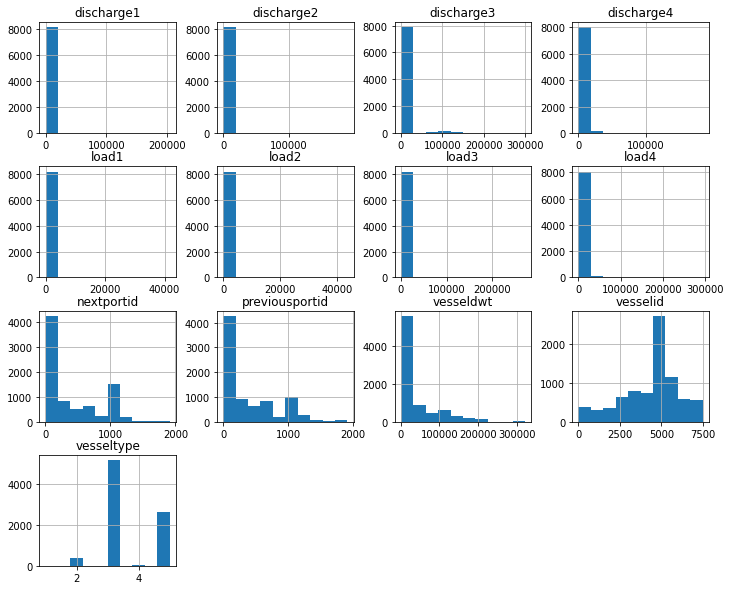

In [29]:
# Plotting the data
# Discharge and load are very skewed (there is a small number of very heavy shipments)
# Vessel type 3 and 5 are the most popular in the dataset.
# Vessel deadweight is also very skewed (there must be several super size vessels).

data.hist(figsize=(12,10))
plt.show()


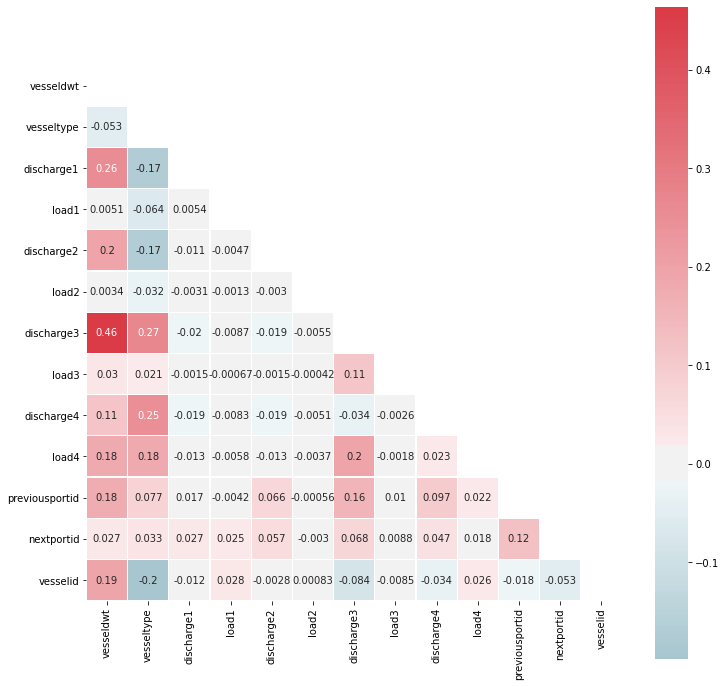

In [30]:
# Printing heatmap to explore correlations between variables.
# We do not see strong correlations, except moderate one between vesseldwt and discharge3.

plt.figure(figsize=(12, 12))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the heatmap
sns.heatmap(data.corr(), mask = mask, annot=True, square=True, cmap = cmap, center=0, linewidths=.2)

plt.show()


In [31]:
# My intutition at this point is that the same ship (vesselid), if checked for different 
# travels, is likely to transport similar types of cargo, albeit in different proportions.

# Also, vesseldwt might help predict the type/amount of cargo.
# Time of arrival and departure might be related to cargo type (different cargo takes more?)


# Since I am supposed to predict the amount, I would need to user regression algorithm, 
# and probably few features are important. I am just not clear how to go about predicting
# 8 continuous variables at once.


In [32]:
# Trying to Create the model for one target variable and see if that makes sense

from sklearn.model_selection import train_test_split
from sklearn import linear_model

discharge3_model = linear_model.LinearRegression()

data_X = data[['vesseldwt', 'vesseltype']]

X_train, X_test, y_train, y_test = train_test_split(data_X, data['discharge3'], test_size=0.2)


discharge3_model = linear_model.LinearRegression().fit(X_train, y_train)

print("Intercept: ", discharge3_model.intercept_)
print("Coefficients: ", discharge3_model.coef_)


Intercept:  -30851.632824960296
Coefficients:  [2.28944794e-01 7.46792217e+03]


In [33]:
from sklearn.metrics import r2_score 


y_pred = discharge3_model.predict(X_train)

r2_score(y_pred, y_train)


-1.377657057234996

In [34]:
y_test_pred = discharge3_model.predict(X_test)

r2_score(y_test_pred, y_test)

-1.6053972344367455

In [35]:
# ok, so the fit is so bad that r2_score is negative.
# At least I discovered in 2 hours where not to continue further. 
